# Importation et Preparation de données 

In [1]:
import pandas as pd
data_openHand=pd.read_csv("./class0_data.csv")
data_openHand=data_openHand.drop(["Unnamed: 0"], axis=1,)
data_openHand

,meanX,meanY,meanZ,stdX,stdY,class
0,0.340405,0.389897,-0.071118,0.065661,0.132062,0
1,0.411505,0.283986,-0.045223,0.068520,0.143484,0
2,0.407197,0.298185,-0.040169,0.067556,0.149036,0
3,0.461817,0.229994,-0.042712,0.069907,0.159890,0
4,0.482023,0.201822,-0.055571,0.071883,0.164498,0
...,...,...,...,...,...,...
1025,0.686055,0.325725,-0.051490,0.069666,0.157859,0
1026,0.681790,0.329286,-0.051591,0.069505,0.157771,0
1027,0.678626,0.333005,-0.054289,0.069537,0.156794,0
1028,0.675963,0.334387,-0.048172,0.069355,0.155916,0


In [3]:
data_closeHand=pd.read_csv("./class1_data.csv")
data_closeHand=data_closeHand.drop(["Unnamed: 0"], axis=1,)
data_closeHand

,meanX,meanY,meanZ,stdX,stdY,class
0,0.154487,0.361844,-0.011553,0.036518,0.041710,1
1,0.160990,0.341099,-0.000883,0.034289,0.043641,1
2,0.173383,0.324125,0.003753,0.034366,0.042383,1
3,0.185414,0.314464,0.003707,0.033295,0.044524,1
4,0.198835,0.302632,-0.006817,0.034622,0.044423,1
...,...,...,...,...,...,...
1320,0.740393,0.146831,0.023651,0.026964,0.062858,1
1321,0.787584,0.145022,-0.023500,0.037246,0.057660,1
1322,0.803383,0.144791,-0.025726,0.033883,0.061093,1
1323,0.812711,0.143914,-0.008844,0.034781,0.057385,1


In [7]:
frame=[data_openHand,data_closeHand]
data=pd.concat(frame)                         # concatener les deux dataframes
data
# data.drop(["Unnamed: 0"], axis=1)

,meanX,meanY,meanZ,stdX,stdY,class
0,0.340405,0.389897,-0.071118,0.065661,0.132062,0
1,0.411505,0.283986,-0.045223,0.068520,0.143484,0
2,0.407197,0.298185,-0.040169,0.067556,0.149036,0
3,0.461817,0.229994,-0.042712,0.069907,0.159890,0
4,0.482023,0.201822,-0.055571,0.071883,0.164498,0
...,...,...,...,...,...,...
1320,0.740393,0.146831,0.023651,0.026964,0.062858,1
1321,0.787584,0.145022,-0.023500,0.037246,0.057660,1
1322,0.803383,0.144791,-0.025726,0.033883,0.061093,1
1323,0.812711,0.143914,-0.008844,0.034781,0.057385,1


In [4]:
# data= data.sample(frac=1).reset_index()
# data=data.drop(["index"], axis=1)
# data.head()

In [5]:
# data=data.drop(["Unnamed: 0"], axis=1)
# data.head()

In [8]:
data_to_use=data.copy(deep=True)

data_to_use.head()


,meanX,meanY,meanZ,stdX,stdY,class
0,0.340405,0.389897,-0.071118,0.065661,0.132062,0
1,0.411505,0.283986,-0.045223,0.068520,0.143484,0
2,0.407197,0.298185,-0.040169,0.067556,0.149036,0
3,0.461817,0.229994,-0.042712,0.069907,0.159890,0
4,0.482023,0.201822,-0.055571,0.071883,0.164498,0


# K neighboors
## Train Test Split


In [9]:
from sklearn.model_selection import train_test_split

X=data_to_use.drop(['class'],axis=1) # supprimer la colonne Hand qui permet d'indique si c'est ouvert ou pas 
y=data_to_use["class"]

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1,shuffle=True)
X_train.shape, y_train.shape

((1884, 5), (1884,))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
 
Knn= KNeighborsClassifier(n_neighbors=5) # n_neigbors value of key
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
Knn.score(X_test,y_test)  # la valeur optimale est 3

0.9766454352441614

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = Knn.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
cm


array([[201,   5],
       [  6, 259]], dtype=int64)

In [14]:
y_predic1=Knn.predict([[0.43001091338339303,0.6626919366064525,-0.024822250292014812,0.03582742611384501,0.04536368541562442
]])
print(y_predic1)

[1]


c:\Users\abdon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

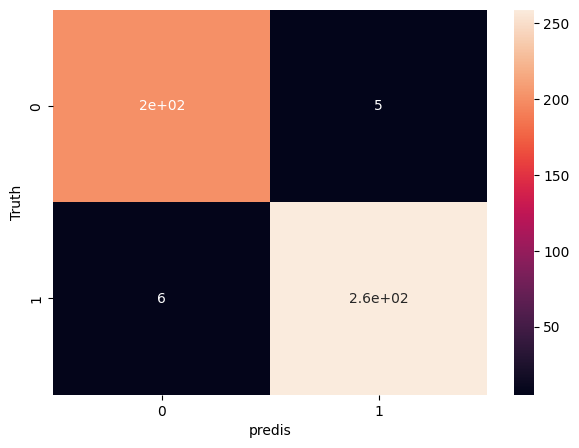

In [15]:
# %matplotlib

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('predis')
plt.ylabel('Truth')

# le diagonale est toujours les valeurs vraies 

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       206
           1       0.98      0.98      0.98       265

    accuracy                           0.98       471
   macro avg       0.98      0.98      0.98       471
weighted avg       0.98      0.98      0.98       471



In [17]:
import pickle #pickle

# save model
with open('knn.pickle', 'wb') as f:
    pickle.dump(Knn, f)

#read Model
# with open('knn.pickle', 'rb') as f:
#     clf = pickle.load(f)
